--- Part 1: Data Cleaning & Exploratory Data Analysis (EDA) ---

--- 1.1 Initial Data Exploration ---

Dataset Shape:
(7043, 21)

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043

/tmp/ipython-input-4189675651.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(median_total_charges, inplace=True)


Saved visualization to 'churn_by_contract.png'
Saved visualization to 'tenure_distribution.png'

--- 1.5 Key Insights from EDA ---
1. Contract Type is a strong indicator of churn. Customers with month-to-month contracts are far more likely to churn compared to those with longer-term contracts.
2. Customer tenure is inversely related to churn. New customers are more likely to leave, while long-term customers tend to be more loyal.
3. Customers with higher monthly charges and those using fiber optic internet service also show a higher tendency to churn.

--- Part 2: Model Building & Evaluation ---

Training set shape: (5634, 19)
Testing set shape: (1409, 19)

--- 2.4 Training Logistic Regression Model ---

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73  

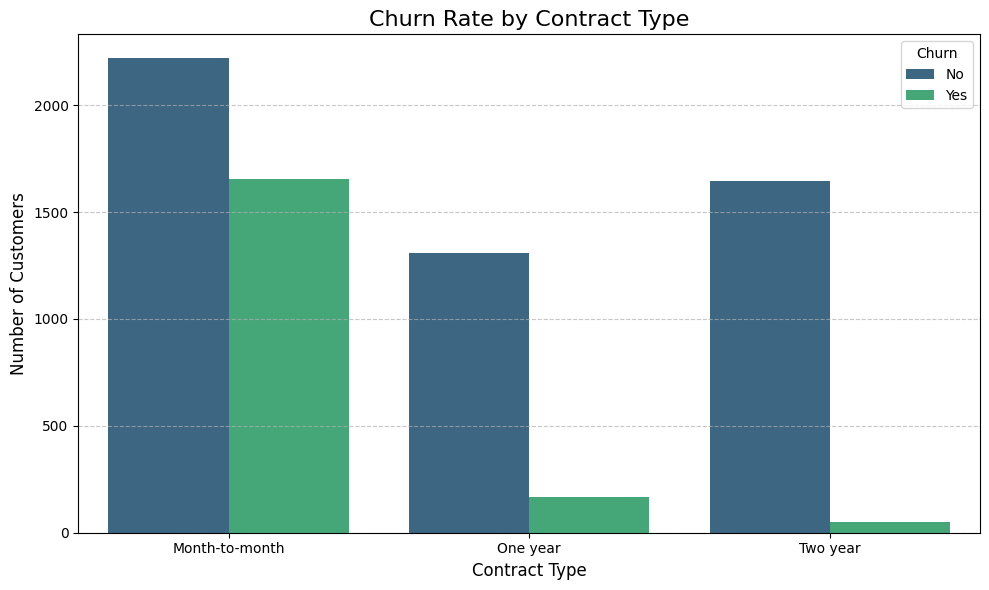

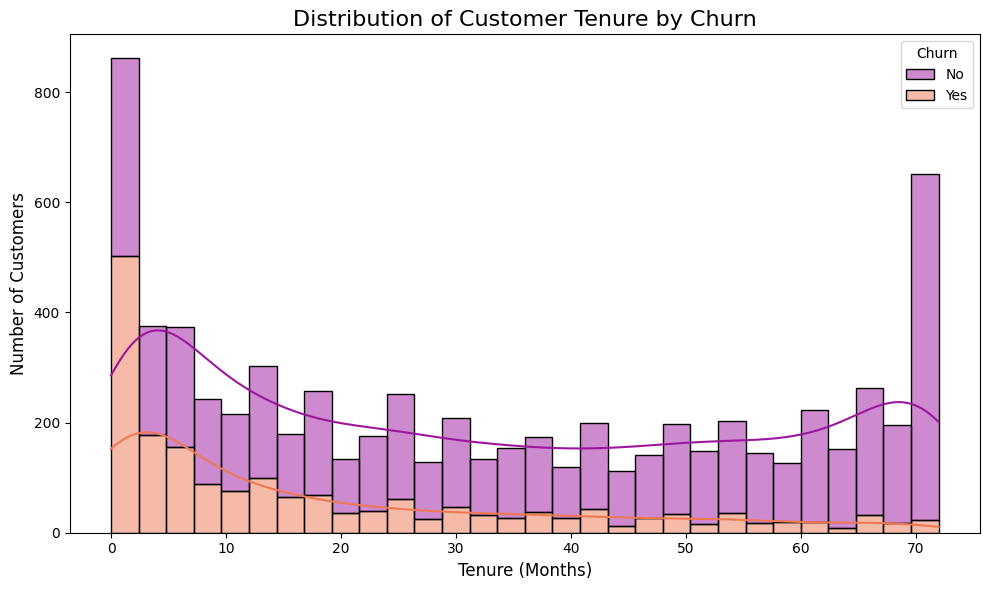

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# --- Part 1: Data Cleaning & Exploratory Data Analysis (EDA) ---
print("--- Part 1: Data Cleaning & Exploratory Data Analysis (EDA) ---")
print("\n--- 1.1 Initial Data Exploration ---")
print("\nDataset Shape:")
print(df.shape)

print("\nData Types and Missing Values:")
df.info()

# --- 1.2 Data Cleaning ---
print("\n--- 1.2 Data Cleaning ---")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"\nNumber of missing 'TotalCharges' values after coercion: {df['TotalCharges'].isnull().sum()}")
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total_charges, inplace=True)
print(f"Missing values in 'TotalCharges' after filling: {df['TotalCharges'].isnull().sum()}")

# --- 1.3 Descriptive Statistics ---
print("\n--- 1.3 Descriptive Statistics ---")
print(df.describe())

# --- 1.4 Visualizations ---
print("\n--- 1.4 Visualizations ---")

# Visualization 1: Churn Rate by Contract Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title('Churn Rate by Contract Type', fontsize=16)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("churn_by_contract.png")
print("Saved visualization to 'churn_by_contract.png'")

# Visualization 2: Distribution of Customer Tenure by Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', kde=True, palette='plasma', bins=30)
plt.title('Distribution of Customer Tenure by Churn', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.tight_layout()
plt.savefig("tenure_distribution.png")
print("Saved visualization to 'tenure_distribution.png'")

# --- 1.5 Key Insights from EDA ---
print("\n--- 1.5 Key Insights from EDA ---")
print("1. Contract Type is a strong indicator of churn. Customers with month-to-month contracts are far more likely to churn compared to those with longer-term contracts.")
print("2. Customer tenure is inversely related to churn. New customers are more likely to leave, while long-term customers tend to be more loyal.")
print("3. Customers with higher monthly charges and those using fiber optic internet service also show a higher tendency to churn.")

# --- Part 2: Model Building & Evaluation ---
print("\n--- Part 2: Model Building & Evaluation ---")

# --- 2.1 Feature Selection and Target Variable ---
df_model = df.drop('customerID', axis=1)
X = df_model.drop('Churn', axis=1)
y = df_model['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# --- 2.2 Preprocessing Pipelines ---
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# --- 2.3 Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# --- 2.4 Train and Evaluate Model 1: Logistic Regression ---
print("\n--- 2.4 Training Logistic Regression Model ---")
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42, max_iter=1000))])
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

# --- 2.5 Train and Evaluate Model 2: Random Forest ---
print("\n--- 2.5 Training Random Forest Model ---")
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

# --- 2.6 Model Comparison ---
print("\n--- 2.6 Model Comparison ---")
print("The Logistic Regression model is the better-performing model. It not only has higher overall accuracy but, more importantly, a significantly better recall for predicting churn, making it more effective at identifying at-risk customers.")